In [19]:
import pandas as pd
import matplotlib.pyplot as plt

invoices_df = pd.read_csv("fct_invoice.csv")
customers_df = pd.read_json("dim_customer.json")

### Easy Question 1
How many unique customers are in the dataset?

In [7]:
invoices_df['customer_id'].nunique()

5191

### Easy Question 2

What are the different categories of products available? How many unique categories are there?

In [18]:
categories = invoices_df['category'].unique()
num_categories = len(categories)
print("Product Categories:", categories)
print("Number of Unique Categories:", num_categories)

Product Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of Unique Categories: 8


### Easy Question 3

Which payment method is the most popular? How many times was it used?

In [22]:
payment_counts = invoices_df['payment_method'].value_counts()
most_popular_method = payment_counts.idxmax()
most_popular_count = payment_counts.max()
print(f"The most popular payment method is '{most_popular_method}' with {most_popular_count} uses.")

The most popular payment method is 'Cash' with 44447 uses.


### Medium Question 1

What are the three most popular categories, by total sales?

In [11]:
invoices_df['total_sales'] = invoices_df['quantity'] * invoices_df['price']
invoices_df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

### Medium Question 2

What are the total sales attributed to customers over the age of 45?

In [12]:
merged_df = invoices_df.merge(customers_df, left_on='customer_id', right_on='id')
merged_df[merged_df['age'] > 45]['total_sales'].sum()

82039768.15

### Medium Question 3

How is the data distributed across different invoice dates?

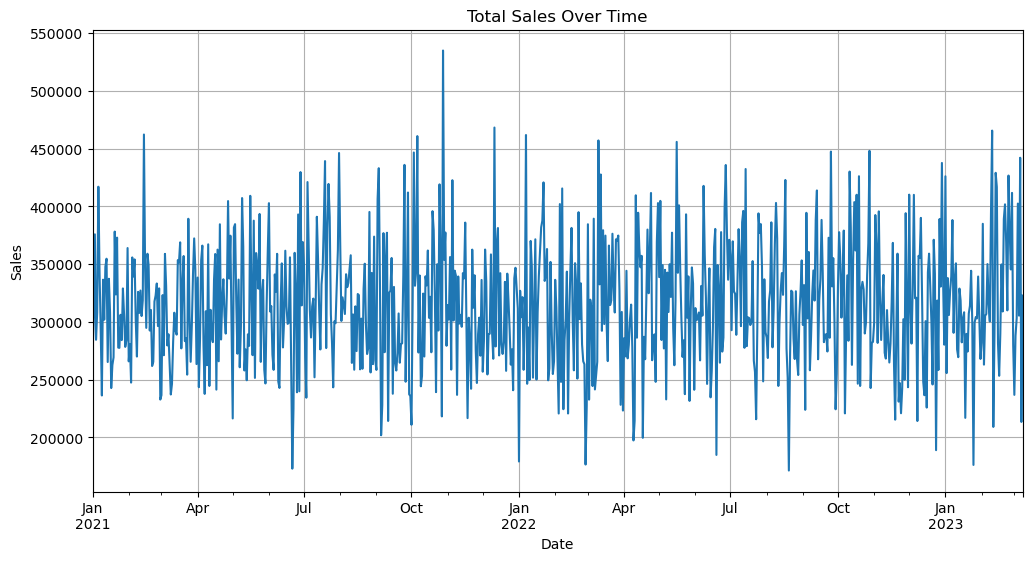

In [13]:
invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'], dayfirst=True)
daily_sales = invoices_df.groupby('invoice_date')['total_sales'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

### Hard Question 1

Pivot table: category × age decade

In [14]:
merged_df['age_group'] = (merged_df['age'] // 10 * 10).astype('Int64')

pivot = pd.pivot_table(
    merged_df,
    values='total_sales',
    index='category',
    columns='age_group',
    aggfunc='sum',
    fill_value=0
)

pivot

age_group,10,20,30,40,50,60,70,80
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
